In [2]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
from matplotlib.image import imread
import pickle as plk
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.base import clone, BaseEstimator
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from PIL import Image
import cv2
import matplotlib.pyplot as plt


In [3]:
dataset_path = Path(os.path.join('C:',os.sep, 'Users', 'Gabriel', 'Desktop', 'FACUL 6ª SEM', 'APS-PI-6SEM', 'dataset', 'V20220930_partial'))

In [4]:
path_labels = {}

path_labels['a'] = dataset_path.joinpath('a_l/train_61')
path_labels['e'] = dataset_path.joinpath('e_l/train_65')
path_labels['i'] = dataset_path.joinpath('i_l/train_69')
path_labels['o'] = dataset_path.joinpath('o_l/train_6f')
path_labels['u'] = dataset_path.joinpath('u_l/train_75')
path_labels['A'] = dataset_path.joinpath('A_u/train_41')
path_labels['E'] = dataset_path.joinpath('E_u/train_45')
path_labels['I'] = dataset_path.joinpath('I_u/train_49')
path_labels['O'] = dataset_path.joinpath('O_u/train_4f')
path_labels['U'] = dataset_path.joinpath('U_u/train_55')

In [5]:
label_to_file = {
    k: [dataset_path / path_label / file for file in os.listdir(dataset_path / path_label)]  # NOQA:E501
    for k, path_label in path_labels.items()
}

In [6]:
X = []
y = []
for key, files in label_to_file.items():
    for path in files:
        y.append(key)
        image = imread(path)
        binary_matrix = []
        for line in image:
            binary_matrix.append([int(cell[0]) for cell in line])

        X.append(np.array(binary_matrix))

In [7]:
#X = [x.reshape(1, -1) for x in X]
X_reshaped = [x.reshape(-1) for x in X]
X_reshaped = np.array(X_reshaped)

In [8]:
#X = np.array(X)

In [9]:
y = np.array(y)

In [10]:
y = ((y=='i')|(y=='I'))

In [11]:
split_test_threshold = 0.2

In [12]:
#selection_iter = StratifiedShuffleSplit(n_splits=1, test_size=split_test_threshold, random_state=42)

In [13]:
#train_index, test_index = next(selection_iter.split(X, y))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [14]:
#X_train = X[train_index]
#X_test = X[test_index]
#y_train = y[train_index]
#y_test = y[test_index]

Alguns testes:

In [15]:
#y_train

In [16]:
#y_test

In [17]:
#len(y)

In [18]:
#len(y_train)

In [19]:
#np.sum(y_train)

In [20]:
#np.sum(y_train)/len(y_train)

In [21]:
#len(y_test)

In [22]:
#np.sum(y_test)

In [23]:
#np.sum(y_test)/len(y_test)

In [24]:
#type(train_index)

Para salvar e carregar as váriaveis:

In [25]:
#with open('train_index.npy', 'wb') as f:
#    np.save(f, train_index)

In [26]:
#with open('test_index.npy', 'wb') as f:
#    np.save(f, test_index)

In [27]:
#with open('X.npy', 'wb') as f:
#    np.save(f, X)

In [28]:
#with open('y.npy', 'wb') as f:
#    np.save(f, y)

In [29]:
#with open('X_train.npy', 'wb') as f:
#    np.save(f, X_train)

In [30]:
#with open('X_test.npy', 'wb') as f:
#    np.save(f, X_test)

In [31]:
#with open('y_train.npy', 'wb') as f:
#    np.save(f, y_train)

In [32]:
#with open('y_test.npy', 'wb') as f:
#    np.save(f, y_test)

In [33]:
#with open('train_index.npy', 'rb') as f:
#    train_index = np.load(f)

In [34]:
#with open('test_index.npy', 'rb') as f:
#    test_index = np.load(f)

In [35]:
#with open('X.npy', 'rb') as f:
#    X = np.load(f)

In [36]:
#with open('y.npy', 'rb') as f:
#    y = np.load(f)

In [37]:
#with open('X_train.npy', 'rb') as f:
#    X_train = np.load(f)

In [38]:
#with open('X_test.npy', 'rb') as f:
#    X_test = np.load(f)

In [39]:
#with open('y_train.npy', 'rb') as f:
#    y_train = np.load(f)

In [40]:
#with open('y_test.npy', 'rb') as f:
#    y_test = np.load(f)

In [41]:
y_train_i = (y_train==True)
y_test_i = (y_test==True)

In [42]:
y_train_i[0]

False

Redimensionar para 2 dimensões:

In [43]:
#nsamples, nxtrain, nytrain = X_train.shape
#d2_X_train = X_train.reshape((nsamples,nxtrain*nytrain))

#nsamples, nxtest, nytest = X_test.shape
#d2_X_test = X_test.reshape((nsamples,nxtest*nytest))

Classificador SGD

In [44]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_i)

SGDClassifier(random_state=42)

In [45]:
y_test[23]

False

In [46]:
type(y_test)

numpy.ndarray

In [47]:
sgd_clf.predict([X_test[23]])

array([False])

In [48]:
type(X_test)

numpy.ndarray

In [49]:
def my_cross_val_score(clf, X_train: pd.array, y_train: pd.array):
    skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_cfl = clone(clf)
        X_train_folds = X_train[train_index]
        y_train_folds = y_train[train_index]
        X_test_folds = X_train[test_index]
        y_test_folds = y_train[test_index]

        clone_cfl.fit(X_train_folds, y_train_folds)
        y_pred = clone_cfl.predict(X_test_folds)
        n_correct = sum(y_pred == y_test_folds)
        print((n_correct/len(y_pred)))

In [50]:
my_cross_val_score(sgd_clf, X_train, y_train_i)

0.875


0.8708333333333333
0.9416666666666667


In [51]:
cross_val_score(sgd_clf, X_train, y_train_i, cv=3, scoring='accuracy')

array([0.94166667, 0.97916667, 0.87916667])

In [52]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_i, cv=3)

In [53]:
confusion_matrix(y_train_i, y_train_pred)

array([[546,  27],
       [ 21, 126]], dtype=int64)

In [54]:
precision_score(y_train_i, y_train_pred)

0.8235294117647058

In [55]:
recall_score(y_train_i, y_train_pred)

0.8571428571428571

In [56]:
f1_score(y_train_i, y_train_pred)

0.84

Rede Neural:

In [57]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='sgd', random_state=42)
mlp_clf.fit(X_train, y_train_i)

c:\Users\Gabriel\Desktop\FACUL 6ª SEM\APS-PI-6SEM\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, solver='sgd')

In [58]:
#mlp_clf.predict([d2_X_test[0]])

In [59]:
y_train_pred_RN = cross_val_predict(mlp_clf, X_train, y_train_i, cv=2)

c:\Users\Gabriel\Desktop\FACUL 6ª SEM\APS-PI-6SEM\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Gabriel\Desktop\FACUL 6ª SEM\APS-PI-6SEM\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
confusion_matrix(y_train_i, y_train_pred_RN)

array([[565,   8],
       [  9, 138]], dtype=int64)

In [61]:
precision_score(y_train_i, y_train_pred_RN)

0.9452054794520548

In [62]:
recall_score(y_train_i, y_train_pred_RN)

0.9387755102040817

In [63]:
f1_score(y_train_i, y_train_pred_RN)

0.9419795221843004

In [102]:
# Função para classificar uma imagem
def pretty_print_mnist_number(number: np.array):
    res = ''
    for linha in number.reshape(128, 128):
        for p in linha:
            res += f'{int(p):>3}'
        res += '\n'
    print(res)

def imagem_to_cinza(matrix_colorida: np.array) -> np.array:
    return cv2.cvtColor(matrix_colorida, cv2.COLOR_RGB2GRAY)
'''
def somar_valores_antes_depois_indice(dicionario, indice, valor_maximo):
    valores_antes = sum(v for i, v in dicionario.items() if i < indice)
    valores_depois = sum(v for i, v in dicionario.items() if i > indice)

    if (abs((valores_antes + valor_maximo) - (valores_depois)) < abs((valores_antes) - (valores_depois + valor_maximo))):
        return indice-1
    else:
        return indice+1
'''

def plotar_histograma_imagem(imagem):

    # Calcular o histograma usando a função cv2.calcHist()
    histograma = cv2.calcHist([imagem], [0], None, [256], [0, 256])

    # Criar um dicionário para armazenar o número de ocorrências para cada valor de intensidade
    #ocorrencias_por_valor = {i: int(hist) for i, hist in enumerate(histograma)}

    # Encontrar a intensidade com o maior número de ocorrências
    #maior_ocorrencia = max(ocorrencias_por_valor, key=ocorrencias_por_valor.get)
    #valor_maximo = ocorrencias_por_valor[maior_ocorrencia]

    limiar, _ = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Encontrar o valor do limiar baseado no pico do histograma
    #limiar = np.argmax(histograma)  # Índice do pico do histograma

    # Binarizar a imagem usando o limiar
    _, imagem_binarizada = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)


     # Mostrar a imagem binarizada
    plt.imshow(imagem_binarizada, cmap='gray')
    plt.title('Imagem Binarizada')
    plt.axis('off')
    plt.show()

    # Plotar o histograma
    plt.plot(histograma)
    plt.title('Histograma da Imagem em Tons de Cinza')
    plt.xlabel('Valores de Pixel')
    plt.ylabel('Número de Pixels')
    plt.show()

    return limiar

def redimensionar_imagem(caminho_da_imagem):
    # Carregar a imagem
    imagem = Image.open(caminho_da_imagem)

    # Redimensionar para uma nova largura e altura
    nova_largura = 128
    nova_altura = 128
    imagem_redimensionada = imagem.resize((nova_largura, nova_altura))

    imagem_redimensionada.save("img/nova_imagem_redimensionada.jpg")

def preprocess_image(caminho_da_imagem):
    
    # Redimensionar imagem
    redimensionar_imagem(caminho_da_imagem)

    # Ler a imagem
    img = cv2.imread("img/nova_imagem_redimensionada.jpg")

    # Aplicar filtro bilateral
    img_filtered = cv2.bilateralFilter(img, 9, 75, 75)

    # Converter para tons de cinza
    gray = cv2.cvtColor(img_filtered, cv2.COLOR_BGR2GRAY)

    # Aplicar limiarização adaptativa
    binarized = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Aplicar operações morfológicas (erosão e dilatação)
    kernel = np.ones((3, 3), np.uint8)
    binarized = cv2.erode(binarized, kernel, iterations=1)
    binarized = cv2.dilate(binarized, kernel, iterations=1)

    # Mostrar as imagens para verificar o progresso do pré-processamento
    plt.imshow(img, cmap='gray')
    plt.title('Imagem Normal')
    plt.axis('off')
    plt.show()

    plt.imshow(binarized, cmap='gray')
    plt.title('Imagem Binarizada')
    plt.axis('off')
    plt.show()
    #cv2.imshow('Imagem Original', img)
    #cv2.imshow('Imagem Processada', binarized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return binarized

def classificar_imagem(classificador, caminho_da_imagem):
    
    redimensionar_imagem(caminho_da_imagem)

    imagem2 = imread("img/nova_imagem_redimensionada.jpg")

    imagem_cinza = imagem_to_cinza(imagem2)

    limiar = plotar_histograma_imagem(imagem_cinza) # Valor entre 0 e 255

    # Converter para matriz binária
    matriz_binaria = (preprocess_image(caminho_da_imagem) > 128).astype(int)
    #_, matriz_binaria = cv2.threshold(imagem_cinza, limiar, 255, cv2.THRESH_BINARY)
    #plt.imshow(matriz_binaria, cmap='gray')
    #imagem_processada = preprocess_image(caminho_da_imagem).reshape(1, -1) 
    imagem_processada = matriz_binaria.reshape(1, -1)

    pretty_print_mnist_number(matriz_binaria)
    
    previsao = classificador.predict(matriz_binaria)
    
    pretty_print_mnist_number(imagem_processada)
    print(previsao)


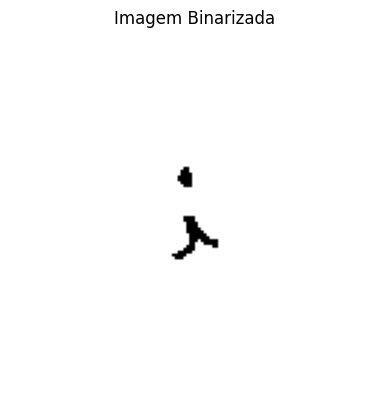

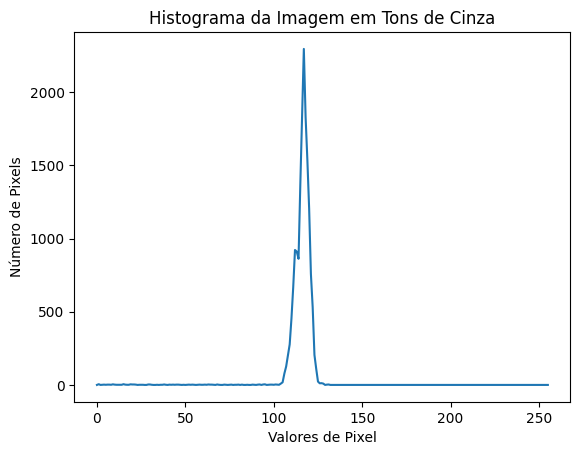

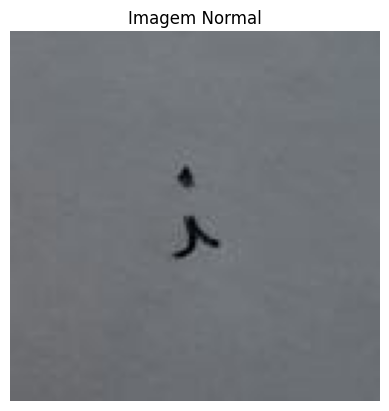

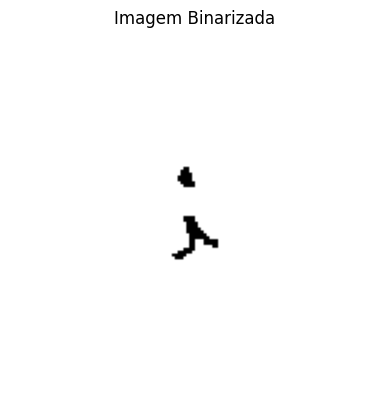

  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  

ValueError: X has 128 features, but SGDClassifier is expecting 16384 features as input.

In [103]:
classificar_imagem(sgd_clf, "img/teste_true_5.jpeg")

In [ ]:
preprocess_image("img/teste_false_1.jpeg")

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)